# Guided Project: Clean and Analyse Employee Exit Surveys

## Introduction

We are going to work on exit surveys from the Department of Education, Training and Employment (DETE) and Further Education (TAFE) institute in Queensland, Australia.

We are going to try to answer the following questions:

* Are employees that only worked for the institutes for a short period of time resigining to some kind of dissatisfaction?  What about employees that have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The data were collected using the same survey template but one of the datasets has customised answers.

#### Import libraries and modules

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Import data

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

##### Initial data exploration

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
dete_survey['SeparationType'].nunique()

9

In [6]:
dete_survey['SeparationType'].value_counts()

SeparationType
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

In [7]:
dete_survey['Cease Date'].value_counts()

Cease Date
2012          344
2013          200
01/2014        43
12/2013        40
09/2013        34
Not Stated     34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
07/2014         2
02/2014         2
04/2014         2
08/2012         2
04/2013         2
2014            1
07/2012         1
2010            1
11/2012         1
09/2010         1
09/2014         1
07/2006         1
Name: count, dtype: int64

In [8]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [9]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [10]:
tafe_survey['Reason for ceasing employment'].value_counts()

Reason for ceasing employment
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64

Observations:
* Column names are inconsistent in format and across both datasets and will need to be tidied up.
* Reasons for leaving may need to be consolidated for ease of analysis.
* There are quite a lot of columns in both datasets that we won't need so can be removed.
* There will be work to do on dates to get them in a useable format (missing info not logged as missing to be dealt with also).

## Identify Missing Values and Drop Unnecessary Columns

In [11]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [12]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [13]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

The DETE survey data has been reloaded using the `na_values` parameter to import missing dates as NaNs.

Columns that are unnecessary for our analysis have been dropped using the `drop()` function on the DataFrames.

## Clean Column Names

In [14]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [15]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

In [16]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [17]:
tafe_columns_map = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}
tafe_survey_updated.rename(tafe_columns_map, axis=1, inplace=True)

In [18]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [19]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Filter the Data

In [20]:
dete_survey_updated['separationtype'].value_counts()

separationtype
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

In [21]:
tafe_survey_updated['separationtype'].value_counts()

separationtype
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64

In [22]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.startswith('Resignation')].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

We want to focus on records where the `separationtype` indicates 'Resignation' as the reason for leaving.

## Verify the Data

In [23]:
dete_resignations['cease_date'].value_counts()

cease_date
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: count, dtype: int64

In [24]:
dete_cease_dates = dete_resignations['cease_date'][:]

In [25]:
dete_cease_dates.value_counts()

cease_date
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: count, dtype: int64

In [26]:
pattern = r"([0-9]{4})"
dete_resignations.loc[:, 'cease_date'] = dete_resignations['cease_date'].str.extract(pattern).astype(float)[0].copy()

In [27]:
dete_resignations.loc[:, 'cease_date'].value_counts().sort_index()

cease_date
2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: count, dtype: int64

In [28]:
dete_resignations.loc[:, 'dete_start_date'].value_counts().sort_index()

dete_start_date
1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: count, dtype: int64

In [29]:
tafe_resignations.loc[:, 'cease_date'].value_counts().sort_index()

cease_date
2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: count, dtype: int64

## Create a New Column

In [30]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [31]:
dete_resignations['institute_service'].value_counts().sort_index()

institute_service
0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: count, dtype: int64

## Identify Dissatisfied Employees

In [32]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

Contributing Factors. Dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
Name: count, dtype: int64

In [33]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

Contributing Factors. Job Dissatisfaction
-                      270
Job Dissatisfaction     62
Name: count, dtype: int64

In [34]:
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    if value == '-':
        return False
    return True

In [35]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].map(update_vals).any(axis=1)
tafe_resignations_up = tafe_resignations.copy()

In [36]:
dete_resignations['job_dissatisfaction'].value_counts()

job_dissatisfaction
False    270
True      41
Name: count, dtype: int64

In [37]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
                                                     'dissatisfaction_with_the_department',
                                                     'physical_work_environment',
                                                     'lack_of_recognition',
                                                     'lack_of_job_security',
                                                     'work_location',
                                                     'employment_conditions',
                                                     'work_life_balance',
                                                     'workload']].any(axis=1)
dete_resignations_up = dete_resignations.copy()

## Combine the Data

In [38]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [39]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [40]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
maternity/family                                       311
dissatisfaction_with_the_department                    311
job_dissatisfaction                                    311
physical_work_environment                              311
interpersonal_conflicts                                311
ill_health                                             3

In [41]:
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

In [42]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    object 
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
dtypes: bool(1), float64(1), object(8)
memory usage: 46.5+ KB


## Clean the Service Column

In [43]:
combined_updated['institute_service'].value_counts()

institute_service
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
17.0                   6
14.0                   6
22.0                   6
12.0                   6
10.0                   6
16.0                   5
18.0                   5
23.0                   4
24.0                   4
11.0                   4
39.0                   3
19.0                   3
32.0                   3
21.0                   3
25.0                   2
36.0                   2
30.0                   2
26.0                   2
28.0                   2
35.0   

In [44]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)

In [45]:
combined_updated['institute_service'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 651 entries, 0 to 650
Series name: institute_service
Non-Null Count  Dtype 
--------------  ----- 
651 non-null    object
dtypes: object(1)
memory usage: 5.2+ KB


In [46]:
combined_updated['institute_service_ext'] = combined_updated['institute_service'].str.extract(r'(\d+)').astype(float)
combined_updated['institute_service_ext'].value_counts()

institute_service_ext
1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
6.0      17
20.0     17
4.0      16
2.0      14
9.0      14
8.0       8
13.0      8
15.0      7
14.0      6
17.0      6
10.0      6
22.0      6
12.0      6
16.0      5
18.0      5
23.0      4
24.0      4
19.0      3
32.0      3
39.0      3
21.0      3
30.0      2
26.0      2
36.0      2
25.0      2
28.0      2
35.0      1
38.0      1
49.0      1
33.0      1
27.0      1
41.0      1
42.0      1
29.0      1
34.0      1
31.0      1
Name: count, dtype: int64

In [47]:
def service_categories(value):
    if pd.isnull(value):
        return np.nan
    if value >= 11:
        return 'Veteran'
    if value >= 7:
        return 'Established'
    if value >= 3:
        return 'Experienced'
    return 'New'

In [48]:
combined_updated['service_cat'] = combined_updated['institute_service_ext'].apply(service_categories)

In [49]:
combined_updated['service_cat'].value_counts()

service_cat
New            193
Experienced    172
Veteran        136
Established     62
Name: count, dtype: int64

## Perform Initial Analysis

In [50]:
combined_updated['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    411
True     240
Name: count, dtype: int64

In [51]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [52]:
dissat_pivot = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
dissat_pivot

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


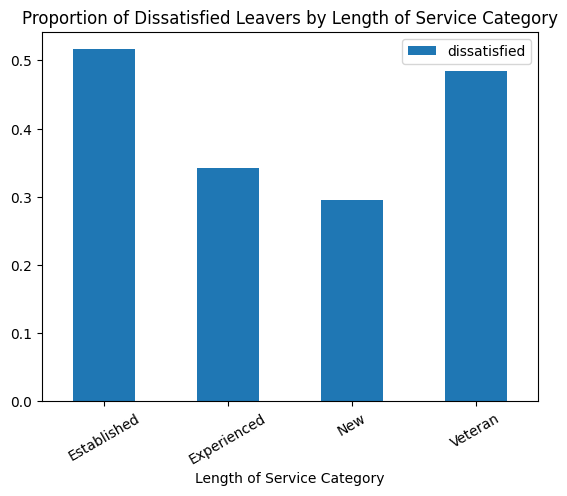

In [56]:
dissat_pivot.plot(kind='bar',
                  title='Proportion of Dissatisfied Leavers by Length of Service Category',
                  rot=30,
                  xlabel='Length of Service Category')
plt.show()

Of the leavers that expressed dissatisfaction, those in the 'New' category (less than 3 years service) had the lowest proportion.